In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [17]:
#input height and weight
height= [[4.0], [4.5], [5.0], [5.2], [5.4], [5.8], [6.1], [6.2], [6.4], [6.8]]
weight= [ 42, 44, 49, 55, 53, 58, 60, 64, 66, 69 ]

In [18]:
'''
Select algorithm based on data analysis
- Split training and testing data
- we will be using Linear regression as regression problem
- Tranining data 70%
- Testing data 30%
'''
H_data = np.array(height)
W_data = np.array(weight)
print(H_data,W_data)
H_train, H_test, W_train, W_test = train_test_split( H_data, W_data, test_size = 0.3 )
print( H_train.shape, W_train.shape )
print( H_test.shape, W_test.shape )

[[4. ]
 [4.5]
 [5. ]
 [5.2]
 [5.4]
 [5.8]
 [6.1]
 [6.2]
 [6.4]
 [6.8]] [42 44 49 55 53 58 60 64 66 69]
(7, 1) (7,)
(3, 1) (3,)


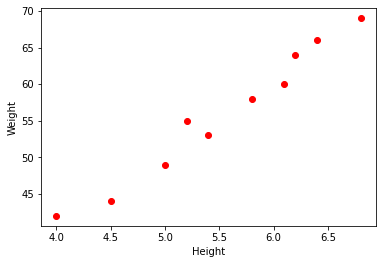

In [19]:
plt.scatter( H_data,W_data,color = 'red' )
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [20]:
# Apply Linear Regression
reg = LinearRegression()
model = reg.fit(H_train, W_train)

In [21]:
#get linear regression coefficients
slope = reg.coef_[0]
intercept = reg.intercept_
print("Slope : {}, Intercept : {}".format(slope, intercept))

Slope : 10.494940607127146, Intercept : -2.136603607567096


In [22]:
#Scores predicted = slope(m) * x(hours) + b(intercept)......(Training)
predicted_scores_on_training_data = np.zeros(H_train.shape)
#print(H_train)
for i in range(len(H_train)):
    predicted_scores_on_training_data[i] = (slope * H_train[i]  + intercept)
print("List : {}".format(predicted_scores_on_training_data))

List : [[62.93202816]
 [39.84315882]
 [69.22899252]
 [54.53607567]
 [45.09062912]
 [65.03101628]
 [50.33809943]]


[62.93202816 39.84315882 69.22899252 54.53607567 45.09062912 65.03101628
 50.33809943]


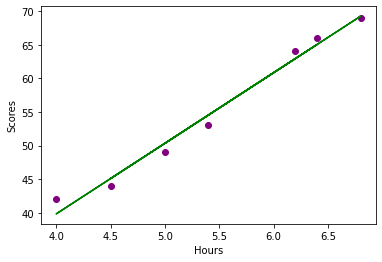

In [23]:
a1 = reg.predict(H_train)
print(a1)
plt.scatter(H_train, W_train, color = 'purple')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(H_train,predicted_scores_on_training_data, color = 'green')
plt.show()


In [24]:
#Scores predicted = slope(m) * x(height) + b(intercept)......(Testing)
predicted_scores_on_testing_data = np.zeros(H_test.shape)
for i in range(len((H_test))):
    predicted_scores_on_testing_data[i] = (slope * H_test[i] + intercept)
print("predicted testing data : {}".format(predicted_scores_on_testing_data))

predicted testing data : [[58.73405191]
 [61.8825341 ]
 [52.43708755]]


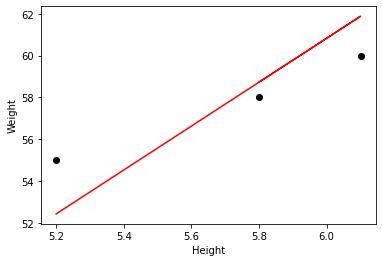

In [25]:
plt.scatter(H_test,W_test,color = 'black')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.plot(H_test,predicted_scores_on_testing_data, color = 'red')
plt.show()

In [26]:
a = reg.score(H_test,W_test)
b = reg.score(H_train,W_train)
print("Testing data : {},Training data : {}".format(a,b))

Testing data : 0.15910891605318955,Training data : 0.9833338891713199


In [29]:
polynomial_equation = PolynomialFeatures(degree = 2)
input_H_train = polynomial_equation.fit_transform(H_train)
#print(polynomial_equation)
print("Input of Training data : {}".format(input_H_train))

input_H_test = polynomial_equation.fit_transform(H_test)
print("Input of testing data : {}".format(input_H_test))

Input of Training data : [[ 1.    6.2  38.44]
 [ 1.    4.   16.  ]
 [ 1.    6.8  46.24]
 [ 1.    5.4  29.16]
 [ 1.    4.5  20.25]
 [ 1.    6.4  40.96]
 [ 1.    5.   25.  ]]
Input of testing data : [[ 1.    5.8  33.64]
 [ 1.    6.1  37.21]
 [ 1.    5.2  27.04]]


In [31]:
#print(polynomial_equation.get_feature_names)
model_train = reg.fit(input_H_train,W_train)
model_test = reg.fit(input_H_test,W_test)

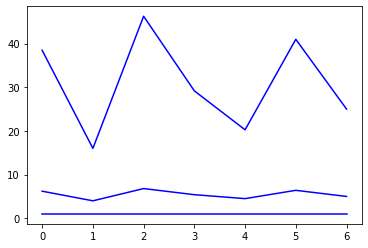

In [32]:
plt.scatter(input_H_train, color = 'blue')
plt.show()